In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import pystan
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)
%matplotlib inline

In [27]:
#データ読み込み
visit=pd.read_csv('input/air_visit_data.csv',parse_dates=["visit_date"])
store=pd.read_csv('input/air_store_info.csv')
holiday=pd.read_csv("input/date_info.csv",parse_dates=["calendar_date"])
holiday.rename(columns={"calendar_date":"visit_date"},inplace=True)

In [33]:
visit["week"]=visit["visit_date"].dt.weekday

In [29]:
store

,air_store_id,air_genre_name,air_area_name,latitude,longitude
414,air_56cebcbd6906e04c,Izakaya,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
415,air_4beac252540f865e,Izakaya,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
416,air_63a88d81295195ed,Izakaya,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
417,air_86cfbf2624576fad,Izakaya,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
418,air_96929a799b12a43e,Izakaya,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
419,air_d69b08a175bc0387,Izakaya,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
420,air_fd6aac1043520e83,Izakaya,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
421,air_9483d65e9cc9a6b7,Izakaya,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
422,air_ffcc2d5087e1b476,Izakaya,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
423,air_c66dbd2c37832d00,Izakaya,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [28]:
#ジャンルを居酒屋に限定
store=store[store["air_genre_name"]=="Izakaya"]
visit=visit[visit["air_store_id"].isin(store["air_store_id"])]

In [4]:
#データの結合
df=pd.merge(visit,store,on="air_store_id",how="left")
df=pd.merge(df,holiday,on="visit_date",how="left")

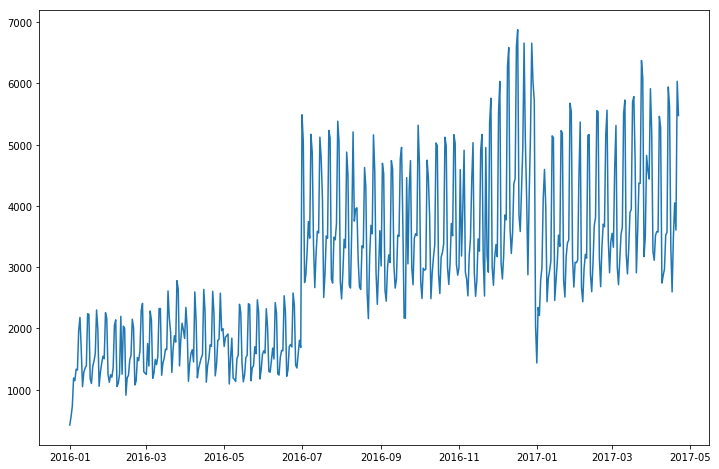

In [31]:
plt.figure(figsize=(12,8))
plt.plot(df.groupby("visit_date")["visitors"].sum())

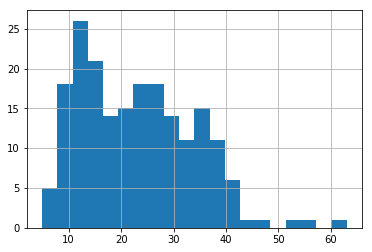

In [16]:
df.groupby("air_store_id")["visitors"].mean().hist(bins=20)

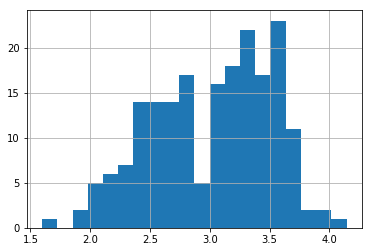

In [17]:
np.log(df.groupby("air_store_id")["visitors"].mean()).hist(bins=20)